In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [6]:
# 표준화 작업
train_scaled = train_input/255.0
# test_scaled = test_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # flatten층에서 사이즈 그래도 적용(28,28)
# Flatten 은 평평하게 해준다는 의미 28*28 구조를 1차원 형태로

train_scaled.shape  # 3차원에서 2차원으로 바뀜

(60000, 28, 28)

In [7]:
# train data 일부를 검증세트로 만들어주기
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [ ]:
# 검증손실 - 확인방법 history = model.fit(validation_data=(val_scaled,val_target))

In [8]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
# 밀집층
model.add(keras.layers.Dense(100,activation='relu',name='hidden')) # 'sigmoid'
# 출력층
# 이진분류이면, softmax -> relu 라고 적어도 되지만 다중분류일 시 softmax를 적어주는게 좋다~ 
model.add(keras.layers.Dense(10,activation='softmax',name='output'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss,accuracy 값을 저장
# train_scaled, val_scaled를 함께 훈련 시팀
history = model.fit(train_scaled, train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7653 - loss: 0.6742 - val_accuracy: 0.8572 - val_loss: 0.4074
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8546 - loss: 0.4093 - val_accuracy: 0.8604 - val_loss: 0.3864
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8725 - loss: 0.3557 - val_accuracy: 0.8596 - val_loss: 0.3772
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8798 - loss: 0.3252 - val_accuracy: 0.8721 - val_loss: 0.3479
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8887 - loss: 0.3019 - val_accuracy: 0.8716 - val_loss: 0.3586
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8952 - loss: 0.2860 - val_accuracy: 0.8814 - val_loss: 0.3226
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8978 - loss: 0.2791 - val_accuracy: 0.8877 - val_loss: 0.3132
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9014 - loss: 0.2709 - 

In [14]:
history.history['loss']
history.history['accuracy']

[0.8142291903495789,
 0.8587291836738586,
 0.8722500205039978,
 0.8801875114440918,
 0.8865000009536743,
 0.8940625190734863,
 0.8976458311080933,
 0.9010833501815796,
 0.9043333530426025,
 0.9088749885559082,
 0.9107916951179504,
 0.914354145526886,
 0.9156249761581421,
 0.9182500243186951,
 0.9203125238418579,
 0.9238541722297668,
 0.9237916469573975,
 0.9254375100135803,
 0.9285416603088379,
 0.9305624961853027]

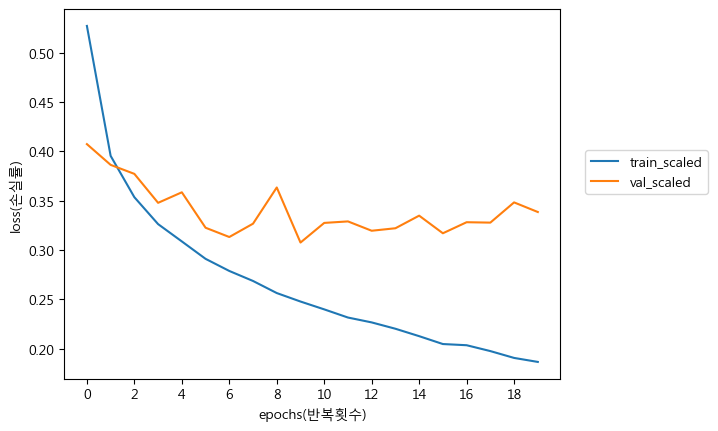

In [22]:
plt.plot(history.history['loss'],label='train_scaled')
plt.plot(history.history['val_loss'],label='val_scaled')
plt.xticks([i for i in range(0,20,2)])
plt.xlabel('epochs(반복횟수)')
plt.ylabel('loss(손실률)')
plt.legend(loc=(1.05,0.5))
plt.show()

In [20]:
# loss와 val_loss 가 모두 줄어들은 epochs 시점을 찾아주는 함수가 있다

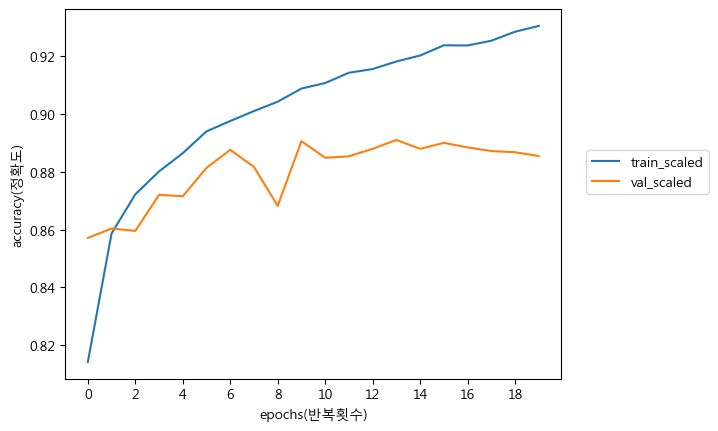

In [23]:
plt.plot(history.history['accuracy'],label='train_scaled')
plt.plot(history.history['val_accuracy'],label='val_scaled')
plt.xticks([i for i in range(0,20,2)])
plt.xlabel('epochs(반복횟수)')
plt.ylabel('accuracy(정확도)')
plt.legend(loc=(1.05,0.5))
plt.show()

#-------------------------------------------------------------------------------------

Dropout(드롭아웃) 규제적용 - 과대적합 문제 해결

epochs를 증가시켰을 때 훈련세트의 정확도는 높아지는데, 검증세트의 정확도는 높아지다가 떨어지는 시점이 존재함

In [24]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu',name='hidden')) # 'sigmoid'
model.add(keras.layers.Dropout(0.3))  # 30%를 제외시키는 규제적용
model.add(keras.layers.Dense(10,activation='softmax',name='output'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss,accuracy 값을 저장
# train_scaled, val_scaled를 함께 훈련 시킴
history = model.fit(train_scaled, train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7337 - loss: 0.7655 - val_accuracy: 0.8483 - val_loss: 0.4260
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8375 - loss: 0.4553 - val_accuracy: 0.8492 - val_loss: 0.4095
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8514 - loss: 0.4089 - val_accuracy: 0.8601 - val_loss: 0.3801
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8593 - loss: 0.3835 - val_accuracy: 0.8612 - val_loss: 0.3743
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8683 - loss: 0.3580 - val_accuracy: 0.8717 - val_loss: 0.3499
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8715 - loss: 0.3510 - val_accuracy: 0.8678 - val_loss: 0.3559
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8757 - loss: 0.3420 - val_accuracy: 0.8802 - val_loss: 0.3318
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.3289 - 

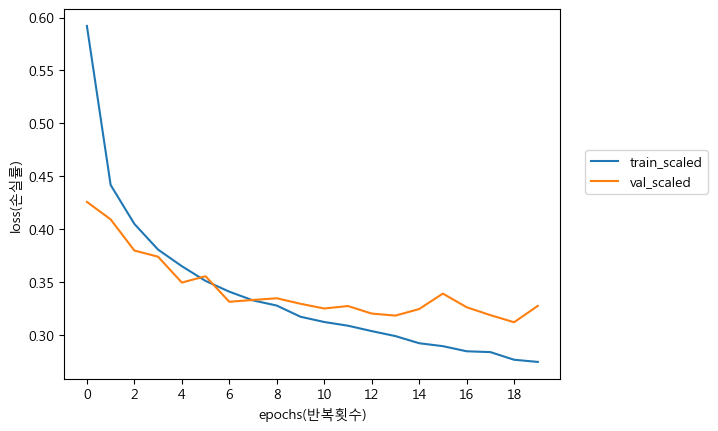

In [27]:
plt.plot(history.history['loss'],label='train_scaled')
plt.plot(history.history['val_loss'],label='val_scaled')
plt.xticks([i for i in range(0,20,2)])
plt.xlabel('epochs(반복횟수)')
plt.ylabel('loss(손실률)')
plt.legend(loc=(1.05,0.5))
plt.show()

>> 손실률이 전보다 많이 낮아진 것을 볼 수 있음

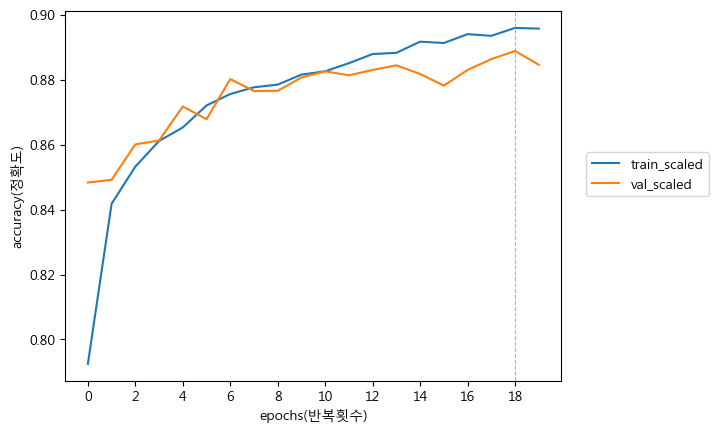

In [34]:
plt.plot(history.history['accuracy'],label='train_scaled')
plt.plot(history.history['val_accuracy'],label='val_scaled')
plt.xticks([i for i in range(0,20,2)])
plt.xlabel('epochs(반복횟수)')
plt.ylabel('accuracy(정확도)')
plt.axvline(x=18,ls='--',color='gray',alpha=0.6,lw=0.8)
plt.legend(loc=(1.05,0.5))
plt.show()

>> train 세트의 정확도와 많이 차이 나지 않게 증가하는 경향을 보임

모델 저장과 복원
- save_weights : 가중치만 저장
- save : 모델 저장

In [35]:
model.save_weights('model0529.weights.h5')

In [36]:
model.save('model_all.h5')

In [21]:
# 딥러닝 훈련
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층(밀집) 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dropout층 추가 model.add(keras.layers.Dropout(0.3))  # 30%를 제외시키는 규제적용
# Dense층(출력) 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# # 옵티마이저 - adam
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=20
#                   validation_data=(val_scaled,val_target))
# 모델평가 model.evaluate(val_scaled,val_target)